## 1. The need for optimization
You've seen the forward-propagation algorithm that neural networks use to make predictions. However, the mere fact that a model has the structure of a neural network does not guarantee that it will make good predictions. To see the importance of model weights, we'll go back to a network you saw in the [previous chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Deep%20Learning/Introduction%20to%20Deep%20Learning/Basics%20of%20deep%20learning%20and%20neural%20networks.ipynb).

#### A baseline neural network
We'll use a simple example for the sake of explanation. For the moment, we won't use an activation function in this example, or if you prefer, you might think of an activation function that returns the input, sometimes called the identity function. 

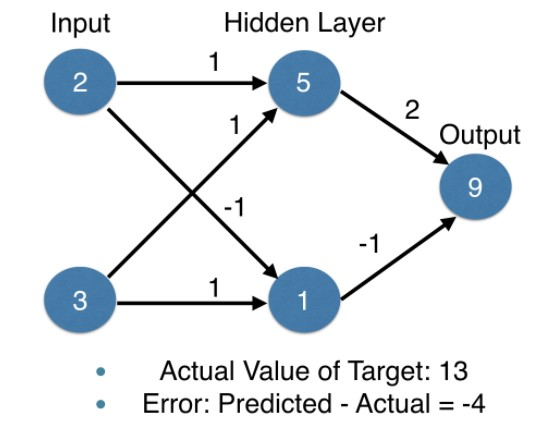

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

We have values of `2` and `3` for the inputs, and the true value of the target is `13`. So, the closer our prediction is to `13`, the more accurate this model is for this data point. 

We use `forward propagation` to fill in the values of `hidden layer`. That gives us `hidden node` values of `5` and `1`. Continuing forward propagation, we use those hidden node values to make a prediction of `9`. 

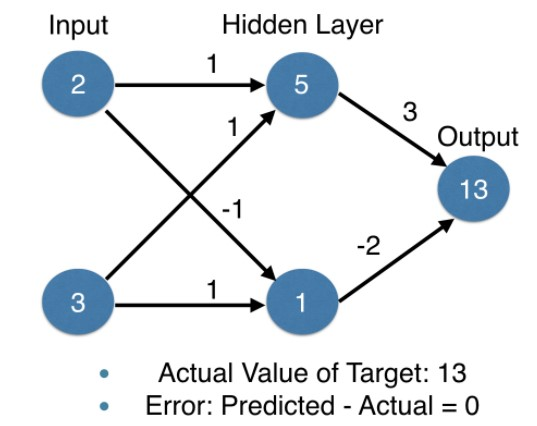

In [2]:
## Hình minh họa Image(fig1, height, width)

Since the true target value is `13`, our error is `13` minus `9`, which is `4`.Changing any weight will change our prediction. 

Let’s see what happens if we change the two weights from the hidden layer to the `output`. 

In this case, we make the top weight `3` and the bottom weight `-2`. Now forward propagation gives us a prediction of 13. That is exactly the value we wanted to predict. So, this change in weights improved the model for this data point.

#### Predictions with multiple points
Making accurate predictions gets harder with multiple points. First of all, at any set of weights, we have many values of the error, corresponding to the many points we make predictions for. 

#### Loss function
We use something called a loss function to aggregate all the errors into a single measure of the model's predictive performance. For example, a common loss function for regression tasks is **mean-squared error `(MSE)`** or known as `Squared error loss function`. You square each error, and take the average of that as a measure of model quality. 

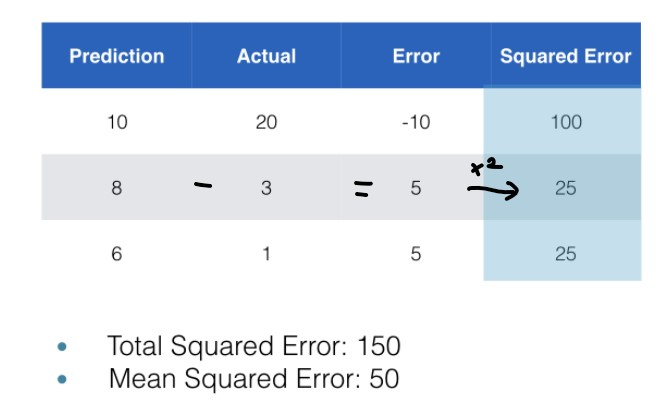

In [3]:
## Hình minh họa Image(fig1, height, width)

The `loss function` aggregates all of the errors into a single score. For an illustration, consider a model with only `2 weights`, we could plot the model's performance for each set of weights like this. The values of the weights are plotted on the `x` and `y` axis, and the `loss function` is on the vertical or `z axis`.

Lower values mean a better model, so our goal is to find the weights giving the lowest value for the loss function. We do this with an algorithm called `gradient descent`. An analogy may be helpful.

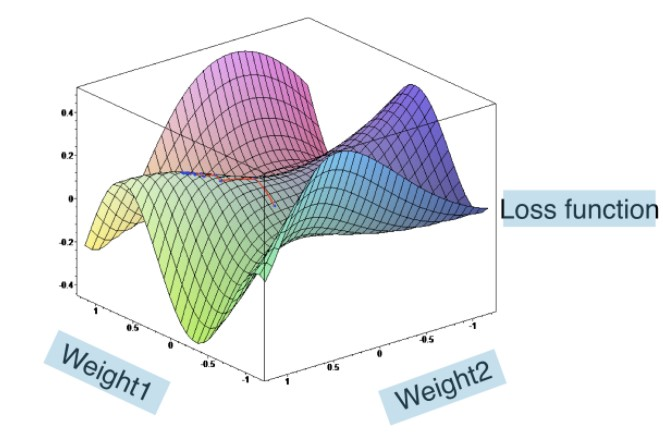

In [4]:
## Hình minh họa Image(fig1, height, width)

#### Gradient descent
Imagine you are in a pitch dark field, and you want to find the lowest point. You might feel the ground to see how it slopes, and take a small step `downhill`. This gives an improvement, but not necessarily the lowest point yet. So you repeat this process until it is uphill in every direction. This is roughly how gradient descent works.

The steps are: Start at a random point, until you are somewhere flat, find the slope, and take a step downhill. 

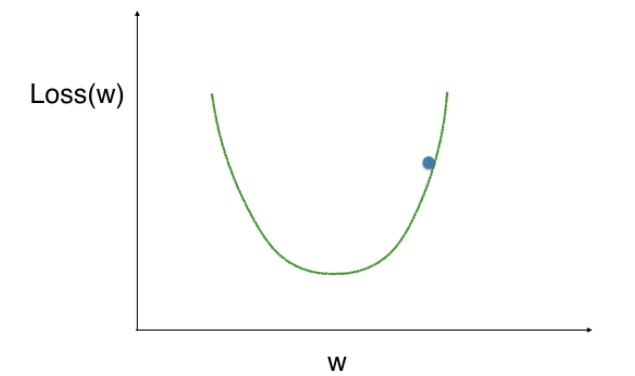

In [5]:
## Hình minh họa Image(fig1, height, width)

#### Optimizing a model with a single weight
Let's look at optimizing a model with a single weight, and then we'll scale up to optimizing multiple weights.

We have a curve showing the loss function on the vertical axis, at different values of the weight, which is on the `horizontal axis`. 

We are **looking for the low point on this curve**, because that means our model is as accurate as possible.

We have drawn this **tangent line** to the curve at our current point.

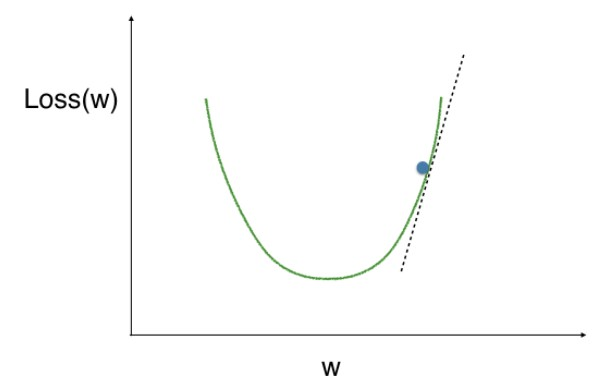

In [6]:
## Hình minh họa Image(fig1, height, width)

The slope of that tangent line captures the slope of the loss function at the our current weight.

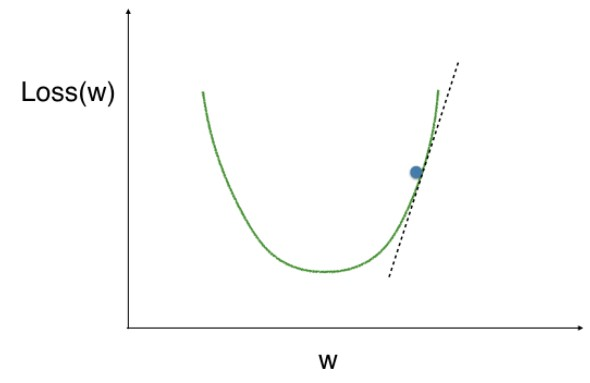

In [7]:
## Hình minh họa Image(fig1, height, width)

That slope corresponds to something called the derivative from calculus. We use this slope to decide what direction we step. In this case, the slope is positive. 

So if we want to go downhill, we go in the direction opposite the slope, towards lower numbers.

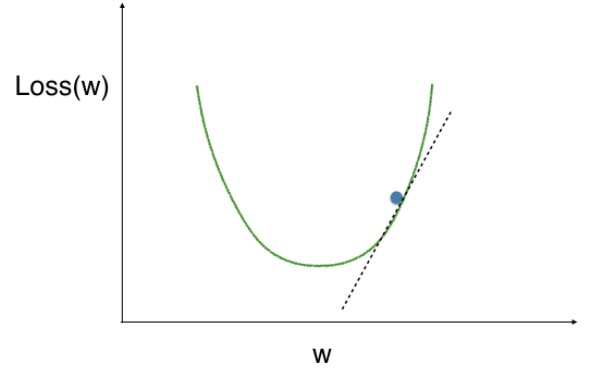

In [8]:
## Hình minh họa Image(fig1, height, width)

If we repeatedly take small steps opposite the slope, recalculating the slope each time, we will eventually get to the minimum value.

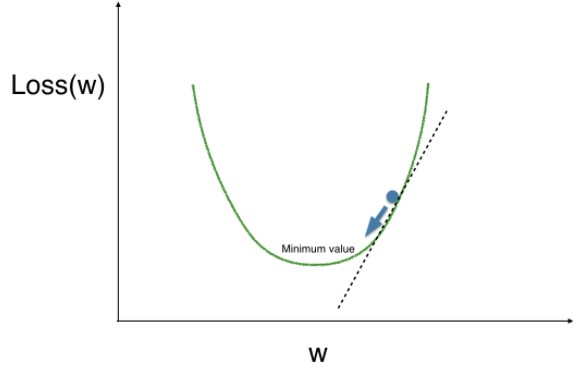

In [9]:
## Hình minh họa Image(fig1, height, width)

 You will see more detail in the next section. 
 
### 1.2. PRACTICES
#### Exercise 1.2.1. Calculating model errors
For the exercises in this chapter, you'll continue working with the network to predict transactions for a bank.

**What is the error (predicted - actual)** for the following network using the `ReLU activation` function when the input data is `[3, 2]` and the actual value of the target (what you are trying to predict) is `5`? It may be helpful to get out a pen and piece of paper to calculate these values. 

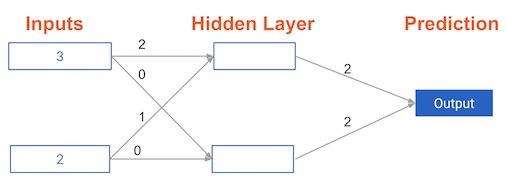

In [10]:
## Hình minh họa Image(fig1, height, width)

#### Answer. `11`
- For the `top-node of hidden layer`, we have
$$ (3 \times 2) + (2 \times 1) = 8 $$
and 
$$ (3 \times 0) + (2 \times 0) = 0 $$
for the `bottom node`.
- Hence, the network generates a `prediction` of.
$$ (8 \times 2) + (0 \times 1) = 8, $$
which results in an error of 
$$ 16 - 5 = 11 $$
since the `actual value` of the target (what you are trying to predict) is 5.

#### Exercise 1.2.2. Understanding how weights change model accuracy
Imagine you have to make a prediction for a single data point. 
- The `actual` value of the target is 7. 
- The `weight` going from `node_0` to the output is `2`, as shown in the previous exercise. 

If you increased it slightly, **changing it to 2.01**, **would the predictions become more accurate, less accurate, or stay the same?**
#### Answers.
- If `weight_node_0 = 2` then by the same argument as in Exercise 1.2.1., we have the `error` is 
$$ [(8 \times 2) + (0 \times 1)] - 7 = 9. $$
- If `weight_node_0 = 2.01`, then
$$ [(8 \times 2.01) + (0 \times 1)] - 7 = 9.08 $$
hence **increasing the weight to 2.01 would increase the resulting error from 9 to 9.08, making the predictions less accurate**.

#### Exercise 1.2.3. Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network.

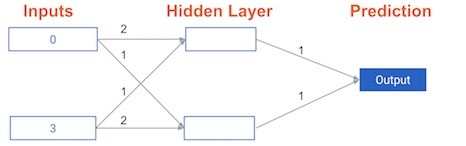

In [11]:
## Hình minh họa Image(fig1, height, width)

Its weights have been pre-loaded as `weights_0`. Your task in this exercise is to update a single weight in `weights_0` to create `weights_1`, which gives a perfect prediction (in which the predicted value is equal to `target_actual: 3`).

#### Your pre-loaded function.

In [12]:
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

Use a pen and paper if necessary to experiment with different combinations. You'll use the `predict_with_network()` function, which takes 
- an `array` of data as the `first argument`, and 
- `weights` as the `second argument`.

#### SOLUTION.

In [13]:
import numpy as np

# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print("- output = [1, 1] then error = ", error_0)
print("- output = [1, 0] then error = ", error_1)

- output = [1, 1] then error =  6
- output = [1, 0] then error =  0


#### Exercise 1.2.4. Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.

- `input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. 
- `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In [14]:
from numpy import array
from sklearn.metrics import mean_squared_error

input_data = [array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': array([2, 1]), 'node_1': array([1, 2]), 'output': array([1, 1])}

weights_1 = {'node_0': array([2, 1]), 'node_1': array([1, 1.5]), 'output': array([1, 1.5])}

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

You'll also use the preloaded `predict_with_network()` function.
#### SOLUTION.

In [15]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


**Comments.** It looks like `model_output_1` has a higher mean squared error.

## 2. Gradient descent
### 2.1. Theory.
With `gradient descent`, you repeatedly repeatedly *found a `slope` capturing how your `loss function` changes as a weight changes*.

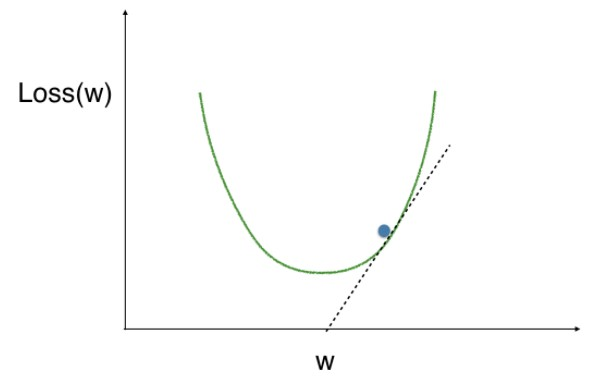

In [16]:
## Hình minh họa Image(fig1, height, width)

You then made a `small change` to the `weight` to get to a `lower point`, and you repeated this until you **couldn't go downhill any more**.

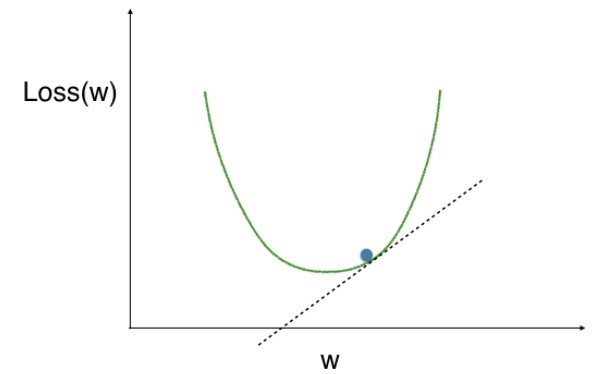

In [17]:
## Hình minh họa Image(fig1, height, width)

If the `slope is positive`, *going opposite the slope means moving to lower numbers*. 
- Subtracting the `slope` from the `current value` achieves this. But too big a step might lead us far astray. 
- So, instead of `directly subtracting the slope`, *we multiply the slope by a small number*, called the **learning rate**, and we change the weight by the product of that multiplication. 

`Learning rate` are frequently around `0.01`. 
- This ensures we take `small steps`, so we reliably move towards the `optimal weights`. But how do we find the relevant slope for each weight we need to update?
- Working this out for yourself involves calculus, especially the application of the chain rule. 

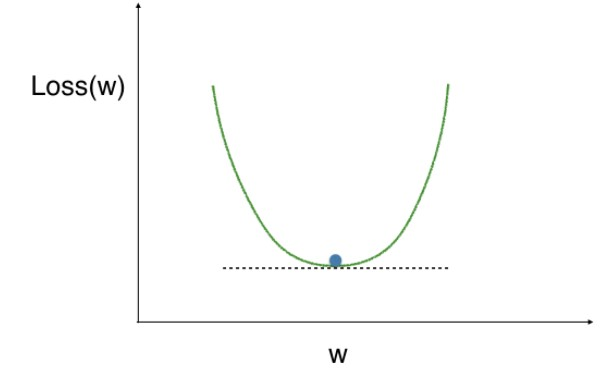

In [18]:
## Hình minh họa Image(fig1, height, width)

Don't worry if you don't remember or don't know the underlying calculus. We'll explain some basic concepts here, and `Keras` and `TensorFlow` do the calculus for us.

#### Slope calculation example
Here is a first example to calculate a `slope` for a `weight`, and in this example we will look at a single data point.

`Weights` feed from one node into another, and you always get the slope you need by multiplying three things. 
- First, the `slope` of the `loss function` with respect to the value at the `node` we feed into.
- Second, the value of the `node` that feeds into our weight. 
- Third, the `slope` of the `activation function` with respect to the value we feed into. 

Let's start with the slope of the loss function with respect to the value of the node our weight feeds into. 

- In this case, that node is the `model's prediction`. If you work through some calculus, you will find that the `slope` of the `mean-squared loss` function with respect to the prediction is 2 times (`predicted value - actual value`). Which is `2` times the `error`. Here, the prediction from `forward propagation` was `6`. The `actual target` value is `10`, so the `error` is `6 - 10 = -4`.
- The second thing we multiply is the value at the `node` we are feeding from. Here, that is `3`.
- Finally, the `slope` of the activation function at the value we feed into.

Since we don't have an activation function here, we can leave that out. So our final result for the slope of the loss if we graphed it against this weight is `2 x -4 x 3 = 24`.

We would now improve this weight by subtracting the learning rate times that slope, `-24`. 
- If the `learning rate` were `0.01`, we would update this weight to be `2.24`. That gives us a `better model`. And it would continue improving if we repeated this process. 
- For `multiple weights` feeding to the output, we repeat this calculation separately for each weight. Then we update both weights simultaneously using their respective `derivatives`.

Here is a network with two weights going directly to an output, and again with `no activation function`.

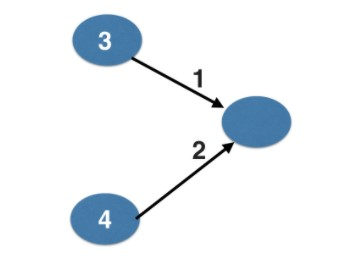

In [19]:
## Hình minh họa Image(fig1, height, width)

#### Code to calculate slopes and update weights
Let’s see the code to calculate slopes and update the weights. First, we set up the weights, input data, and a target value to predict.

Here is the slope calculation.

In [20]:
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
err = preds - target
print("Error = ", err)

Error =  5


We uses `numpy broadcasting`, which multiplies an `array` by a number so that each entry in the array is multiplied by that number. 
- We multiply the two times the error times the `array` with the `input nodes`. This gives us an `array` that used the 1st node value for the first calculated slope, and the `second node` value for the 2nd calculated slope. This is exactly what we wanted. 
- Incidentally, the mathematical term for this array of slopes is a `"gradient"`, and this is where the name `gradient descent` comes from. 

In [21]:
gradient = 2 * input_data * err
gradient

array([30, 40])

- We update the weights by some small step in that `direction`, where the step size is partially determined by the `learning rate`. And the new error is `2.5`, which is an improvement over the old error, which was `5`. 

In [22]:
weights_updated = weights - learning_rate * gradient
pred_updated = (weights_updated * input_data).sum()
err_updated = pred_updated - target
print("Updated error = ", err_updated)

Updated error =  2.5


- Repeating that process from the new values would give further improvements.

### 2.2. PRACTICES
#### Exercise 2.2.1. Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.

In [23]:
input_data = array([1, 2, 3])
weights = array([0, 2, 1])
target = 0

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called `weights` as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in `target`.
#### SOLUTION.

In [24]:
# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[14 28 42]


#### Exercise 2.2.2. Improving model weights
You've just calculated the `slopes` you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. 

However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower `learning rate`, and verify that the model is improving.

The weights have been pre-loaded as `weights`, the actual value of the target as `target`, and the input data as `input_data` as in the previous exercise. The predictions from the initial weights are stored as `preds`.
#### SOLUTION

In [25]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope 

# Get updated predictions: preds_updated
preds_updated = (input_data * weights_updated).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

print("Original error : ", error)
print("Updated error : ", error_updated)

Original error :  7
Updated error :  5.04


**Comments.** Updating the model weights did indeed decrease the error!

#### Exercise 2.2.3. Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

- To keep your code clean, there is a pre-loaded `get_slope()` function that takes `input_data`, `target`, and `weights` as arguments as in Exercise 2.2.1. 
- There is also a `get_mse()` function that takes the same arguments. 
- The `input_data`, `target`, and `weights` have been pre-loaded.

In [26]:
import matplotlib.pyplot as plt

def get_slope(input_data, target, weights):
    """ Update the weights: weights """
    preds = (input_data * weights).sum()
    error = preds - target
    slope = input_data * error * 2
    
    return slope

def get_mse(input_data, target, weights):
    """  Find the Mean square error"""
    preds = (input_data * weights).sum()
    mse = np.mean((preds - target)**2)
    return mse

This `network` does not have any `hidden layers`, and it goes directly from the input (with `3 nodes`) to an `output node`. 

Note that `weights` is a `single array`.

#### SOLUTION.

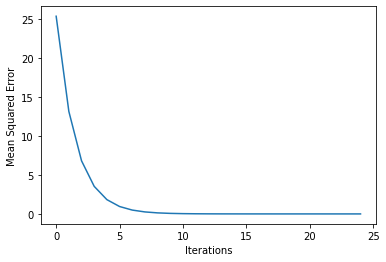

In [27]:
learning_rate = 0.01
n_updates = 25
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - learning_rate * slope 
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

**Comments.** As you can see, the mean squared error decreases as the number of iterations go up.

## 3. Backpropagation
### 3.1. Theory
You’ve used gradient descent to optimize weights in a simple model. Now we'll add a technique called `“back propagation”` to calculate the slopes you need to optimize more complex deep learning models.

Just as `forward propagation` sends input data through the hidden layers and into the `output layer`, `back propagation` takes the error from the output layer and propagates it **backward** through the `hidden layers`, towards the `input layer`.

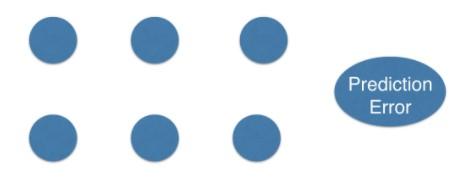

In [28]:
## Hình minh họa Image(fig1, height, width)

It calculates the necessary `slopes` sequentially from the `weights` **closest** to the `prediction`, through the `hidden layers`, eventually back to the `weights` coming from the `inputs`. 

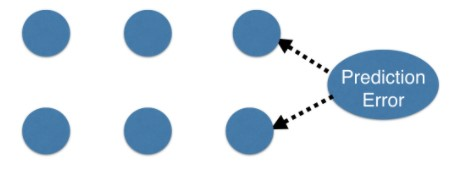

In [29]:
## Hình minh họa Image(fig1, height, width)

We then use these slopes to update our weights as you've seen.

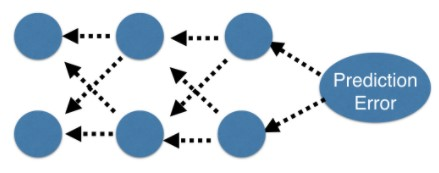

In [30]:
## Hình minh họa Image(fig1, height, width)

**Back propagation** is tricky. So you should focus on the general structure of the algorithm, rather than trying to memorize every mathematical detail.

#### Backpropagation process
In the big picture, we are trying to estimate the slope of the loss function with respect to each weight in our network. You've already seen that we use prediction errors to calculate some of those slopes. 

So we always do **forward propagation** to make a prediction and calculate an error before we do **back propagation**.

- Here are the results of `forward propagation`. 
- `Node` values are in white and `weights` are in black. 

We need to be at this step before we can start `back-propagation`. 

Notice, we are using the `"relu"` activation function. *So any `node` whose input is **negative** takes a value of 0, and that happens in the `top node` of the `first hidden layer`*.

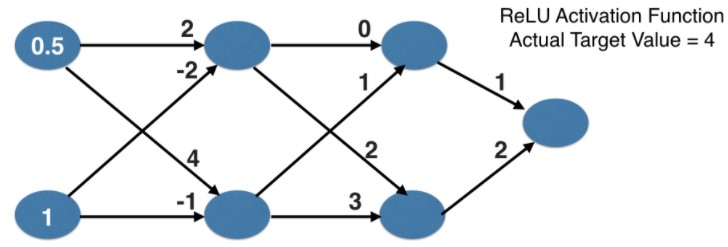

In [31]:
## Hình minh họa Image(fig1, height, width)

For **back-propagation**, we go back one layer at a time, and each time we go back a `layer`, we'll use a formula for slopes that you saw in the last section. 

Every `weight` feeds from some input node into some `output node`. The three things we multiply to get the slope for that weight are:
- 1, the value at the weights input node.
- 2, the slope from plotting the loss function against that weight's output node.
- 3, the slope of the activation function at the weight's output.

We know the value at the `node` feeding into this `weight`. Either it is in an `input layer`, in which case we have it from the data. Or that `node` is in a `hidden layer`, in which case we calculated its value when we did **forward propagation**. 

The second item on this list is the `slope of the loss function` with respect to the `output node`. We do **backward propagation** from the right side of our diagram to the left. So we already calculated that slope by the time we to plug it into the current calculation. 

Finally we need the `slope` of the `activation` function at the `node` it feeds into.

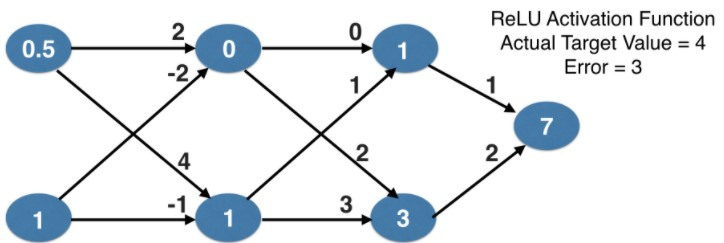

In [32]:
## Hình minh họa Image(fig1, height, width)

You can see from this diagram that, for the **ReLU** function, the `slope` is `0` if the `input` into a `node` is negative.

If the `input` into the `node` is `positive`, the `output` is the same as the `input`. So the `slope` would be `1`.

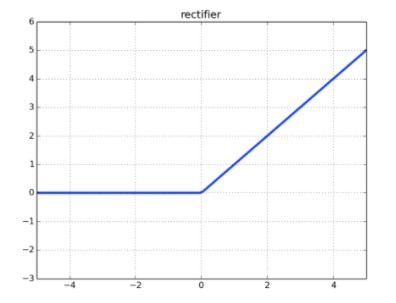

In [33]:
## Hình minh họa Image(fig1, height, width)

So far, we have focused on calculating `slopes` of the `loss function` with respect to `weights`. We also keep track of the `slopes` of the `loss function` with respect to `node` values, because we use those slopes in our calculations of `slopes` at `weights`. 

The `slope` of the `loss function` with respect to any `node` value is the sum of the slopes for every `weight` coming into that node.

### 3.2. PRACTICES
#### Exercise 3.2.1. The relationship between forward and backward propagation
If you have gone through `4 iterations` of calculating slopes (using `backward propagation`) and then updated weights, *how many times must you have done `forward propagation`?*
#### Answers,
- Each time you **generate** `predictions` using `forward propagation`, you **update** the `weights` using `backward propagation`. 
- Hence, the correct answer is $4$.

#### Exercise 3.2.2. Thinking about backward propagation
If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

>- A. The updates to all `weights` in the `network` would also be 0.
>- B. The updates to all `weights` in the `network` would be `dependent` on the `activation functions`.
>- C. The updates to all `weights` in the `network` would be `proportional` to values from the `input data`.

#### Answers & comments.
>- **A. Correct!** In this situation, the updates to all weights in the network would indeed also be 0.
>- B, C. Incorrect!!

## 4. Backpropagation in practice
Let’s see this back propagation in a deeper network.
- Start at the last set of weights. Those are currently 1 and 2.
- We multiply 3 things. The node values feeding into these weights are 1 and 3. The relevant slope for the output node is 2 times the error. That’s 6. And the slope of the activation function is 1, since the output node is positive. 

So, we have a slope for the top weight of 6, and a slope for the bottom weight of `18`.

Those slopes we just calculated feed into the formula associated with weights further back in the network.

Let's do that calculation one layer back now. 

We’ve hidden the earlier and later layers, since we don’t need them to calculate the `slopes` for this layer of the network. 

This graph uses white to denotes node values, black to denote `weight` values, and the red shows the calculated slopes of the `loss function` with respect to that `node`, which we just finished calculating. This is all the information we need to calculate the slopes of the `loss function` with respect to the `weights` in this diagram.

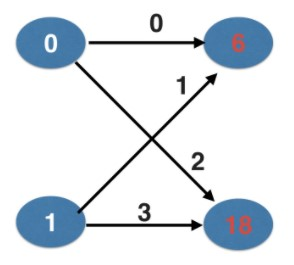

In [34]:
## Hình minh họa Image(fig1, height, width)

#### Calculating slopes associated with any weight
Recall, the 3 things we multiply to get slopes associated with any weight: 
- value at the `node feeding` into the weight,
- the `slope` of the `activation function` for the node being fed into. That slope is 1 in all cases here. 
- The `slope` of the `loss function` with respect to the output node. 

Let's start with the slopes related to the weights going into the `top node`. 
- For the top weight going into the top node, we multiply 0 for the input node's value, which is in white. 
- Times 6 for the `output node's slope`, which is in red. 
- Times the derivative of the ReLU activation function. 
- That `output node` has a positive value for the input, so the ReLU activation has a slope of 1. 0 times 6 times 1 is 0.
- For the other `weight` going into this node, we have 1 times 6 times the slope of the `ReLU activation` function at the output node's value.
- The slope of the activation function is still 1. So, we have 1 times 6 times 1, which is 6. Here we also show slopes associated with the other two weights. 
- We would multiply them all by a learning rate, and use the results to update the weights in gradient descent. 

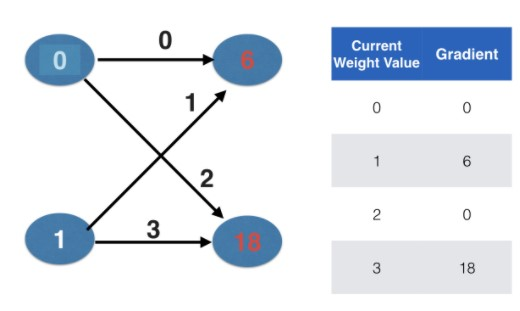

In [35]:
## Hình minh họa Image(fig1, height, width)

As a **recap**, 
- we start at some random set of weights. 
- We then go through the following iterative process 
- Use forward propagation to make a prediction.
- Use backward propagation to calculate the slope of the loss function with respect to each weight. 
- Multiply that slope by the learning rate, and subtract that from the current weights. 
- Keep going with that cycle until we get to a flat part. 

#### Stochastic gradient descent
> For computational efficiency, it is **common to calculate slopes** on only a subset of the data, called a `batch`, for each update of the weights. 

> You then **use a different batch of data to calculate the next update**. 

> *Once we have used all our data*, we **start over** again at **the beginning of the data**. 

> Each time through the full training data is called an **epoch**. So if we're going through our data for the 3rd time, we'd say we are on the 3rd epoch. 

> When `slopes` are calculated on one `batch` at a time, rather than on the full data, that is called **stochastic gradient descent**, rather than `gradient descent`, which uses all of the data for each `slope` calculation. 

The process will be partially automated for you, but understanding the process will help fix any surprises that come up when building your models.

#### Question.  A round of backpropagation
In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the `slopes` calculated as part of back-prop, rather than the forward-prop values. Those `slope` values are shown in purple.

This network again uses the `ReLU` activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1).

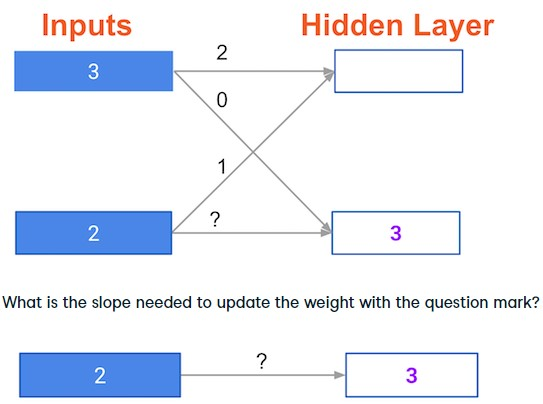

In [36]:
## Hình minh họa Image(fig1, height, width)

#### Answers.
The slope needed to update this weight is indeed `6`.